# Travel Demand Trends to Tech Hubs Using the Amadeus API

In this notebook, we carry out an in-depth exploratory and descriptive analysis of the Travel Demand Dataset, a widely used dataset for building a prototype data pipeline using the Amadeus API to fetch flight and hotel data, analyze travel trends to these destinations, and provide recommendations for travel brands.

This phase of analysis is essential for uncovering patterns, detecting potential biases, and gaining intuition about the dataset’s structure before applying any modelling procedures. We examine the distribution of key numerical and categorical variable,  visualizations to summarize insights. Particular focus is placed ontravel demands across **San Francisco,London, Bangalore, Singapore, and Tel Avivs ,price, number_of_stops, travel_time, available_seats** attributes which lay a solid foundation for downstream modeling and policy-relevant interpretation.



We begin our analysis by importing the core Python libraries required for **data handling**, **numerical computation**, **visualization**, and **directory management**:

- `pandas`: Enables efficient manipulation, filtering, and aggregation of structured tabular data, forming the backbone of our analysis pipeline.

- `numpy`: Provides support for fast numerical operations, array-based computation, and statistical routines.

- `os`: Facilitates interaction with the file system, allowing us to construct flexible and portable directory paths for data and output management.

- `plotly.express`: A high-level graphing library that enables the creation of interactive, publication-quality visualizations, which we use extensively to uncover patterns and present insights throughout the notebook.


In [19]:
import pandas as pd 
import numpy as np 
import os 
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

## Define and Create Directory Paths

To ensure reproducibility and organized storage, we programmatically create directories if they don't already exist for:

- **raw data**
- **processed data**
- **results**
- **documentation**

These directories will store intermediate and final outputs for reproducibility.



In [33]:
# Get working directory 
current_dir = os.getcwd()

# Go one directory up to the root directory 
project_root_dir = os.path.dirname(current_dir)

data_dir = os.path.join(project_root_dir, 'data')
raw_dir = os.path.join(data_dir,'raw')
processed_dir = os.path.join(data_dir,'processed')

# Define paths to results folder 
results_dir = os.path.join(project_root_dir,'results')

# Define paths to docs folder 
docs_dir = os.path.join(project_root_dir,'docs') 

#Create directories if they do not exist 
os.makedirs(raw_dir,exist_ok= True)
os.makedirs(processed_dir,exist_ok= True)
os.makedirs(results_dir,exist_ok= True)
os.makedirs(data_dir,exist_ok= True)

## Loading the Cleaned Dataset

We load the cleaned version of the travel demand Dataset from the processed data directory into a Pandas DataFrame. The `head(10)` function shows the first ten records, giving a glimpse into the data columns such as `Number of Stops`, `Destination`, `Airline`, etc.


In [3]:
travel_demand_filename = os.path.join(processed_dir, 'Travel_cleaned.csv')
df = pd.read_csv(travel_demand_filename)
df.head(10)

,Destination,Departure Date,Airline,Price (USD),Number of Stops,Travel Time,Available Seats,Travel Time Str
0,San Francisco,2025-07-01,B6,79.90,0,0 days 06:15:00,1,06:15
1,San Francisco,2025-07-01,B6,79.90,0,0 days 06:20:00,1,06:20
2,San Francisco,2025-07-01,B6,79.90,0,0 days 06:35:00,1,06:35
3,San Francisco,2025-07-01,B6,79.90,0,0 days 06:45:00,1,06:45
4,San Francisco,2025-07-01,F9,156.03,1,0 days 05:42:00,3,05:42
5,San Francisco,2025-07-01,F9,156.03,1,0 days 02:55:00,3,02:55
6,San Francisco,2025-07-01,F9,160.88,1,0 days 04:01:00,3,04:01
7,San Francisco,2025-07-01,F9,160.88,1,0 days 02:28:00,3,02:28
8,San Francisco,2025-07-01,F9,160.88,1,0 days 05:42:00,3,05:42
9,San Francisco,2025-07-01,B6,215.15,1,0 days 03:17:00,1,03:17


## Dataset Dimensions and Data Types

Here, we examine the structure of the dataset:

- There are *7,870* entries and *8* variables.
- The dataset includes both **numerical** (e.g., `Price (USD)`, `Travel Time`) and **categorical** variables (e.g., `Airline`, `Destination`).

Understanding data types and null entries is essential before proceeding with analysis.


In [4]:
df.shape

(7870, 8)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7870 entries, 0 to 7869
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Destination      7870 non-null   object 
 1   Departure Date   7870 non-null   object 
 2   Airline          7870 non-null   object 
 3   Price (USD)      7870 non-null   float64
 4   Number of Stops  7870 non-null   int64  
 5   Travel Time      7870 non-null   object 
 6   Available Seats  7870 non-null   int64  
 7   Travel Time Str  7870 non-null   object 
dtypes: float64(1), int64(2), object(5)
memory usage: 492.0+ KB


In [6]:
df['Departure Date'] = pd.to_datetime(df['Departure Date'])
df['Price (USD) '] = df['Price (USD) '].replace('[\$,]', '', regex=True).astype(float)


In [7]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7870 entries, 0 to 7869
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Destination      7870 non-null   object        
 1   Departure Date   7870 non-null   datetime64[ns]
 2   Airline          7870 non-null   object        
 3   Price (USD)      7870 non-null   float64       
 4   Number of Stops  7870 non-null   int64         
 5   Travel Time      7870 non-null   object        
 6   Available Seats  7870 non-null   int64         
 7   Travel Time Str  7870 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 492.0+ KB


## Summary Statistics: Numerical Variables

These variables represent measurable quantities used for computations, aggregations, and visualizations such as bar charts, scatterplots, or boxplots.

**Number of Stops**
This column indicates how many stops a flight has (e.g., 0 for nonstop, 1, or 2). It is a discrete numeric variable, often used in categorization and to study its impact on price or travel time. Most flights in the dataset have exactly 1 stop.

**Available Seats**
This variable shows the number of seats still available on a given flight. It is a count-based integer feature, useful for understanding booking trends and demand. The typical flight has between 7 to 9 seats available.

**Price (USD)**
This column records the price of each flight in US dollars. It is a continuous numeric variable with values ranging from as low as 79.9 to  over   17,000. It's essential for analyzing cost differences between destinations, airlines, and travel conditions.

**Departure Date**
While this column is stored in datetime format, it has both numeric (timestamp) and temporal (calendar) significance. It allows for filtering flights by day, week, or month and enables time-based trend analysis. In this project, the focus is only on flights departing in **July**.


In [8]:
df.describe()

,Departure Date,Price (USD),Number of Stops,Available Seats
count,7870,7870.000000,7870.000000,7870.000000
mean,2025-07-14 13:16:28.970775040,871.942412,0.995172,7.189835
min,2025-07-01 00:00:00,79.900000,0.000000,1.000000
25%,2025-07-08 00:00:00,398.430000,1.000000,7.000000
50%,2025-07-15 00:00:00,563.670000,1.000000,9.000000
75%,2025-07-21 00:00:00,922.370000,1.000000,9.000000
max,2025-07-28 00:00:00,17408.880000,2.000000,9.000000
std,NaN,1088.171661,0.576118,2.728732


## Summary Statistics: Categorical Variables

These variables represent distinct groups or categories useful for segmentation and group comparisons.

**Destination**
This column specifies the city or tech hub to which the flight is headed (e.g., London, Tel Aviv, Bangalore). It helps segment the data geographically for price, availability, or demand comparisons. There are 5 unique destinations in the dataset.

**Airline**
This field lists the airline operating each flight (e.g., B6, Delta, Emirates). With 53 unique airlines, it provides an opportunity to assess performance and pricing differences across carriers. It can also help identify popular or dominant airline routes.

**Travel Time**
This column captures the total flight duration in timedelta format. It is numeric in nature but often converted into minutes or hours for analysis. It plays a key role in visualizing travel efficiency and correlations with stops or prices.

**Travel Time Str**
This column is a string-formatted version of the `Travel Time` column, displayed as `HH:MM`. It is not numeric but useful for visual labeling and grouping similar flight durations. While not used for calculations, it aids readability in charts and summaries.


In [9]:
df.describe(include='object')

,Destination,Airline,Travel Time,Travel Time Str
count,7870,7870,7870,7870
unique,5,53,122,122
top,London,B6,0 days 07:55:00,07:55
freq,2920,870,460,460


In [15]:
df.columns = df.columns.str.strip()


## Visualisation

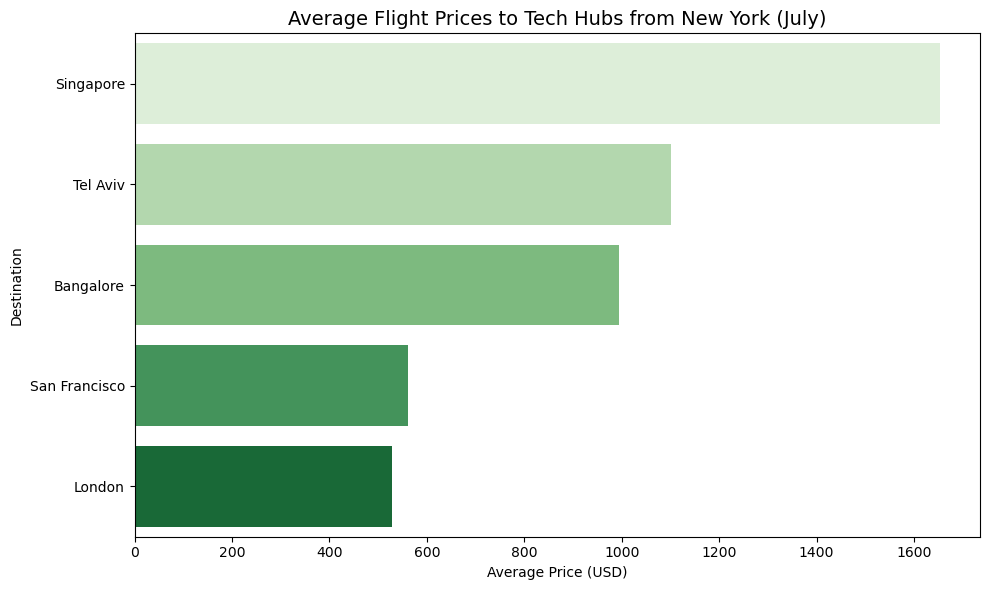

In [36]:
#| label: q1-average-price-bar
#| fig-cap: "Average Flight Prices to Tech Hubs from New York"
#| echo: true

# Group and calculate mean price by destination
avg_prices = df.groupby('Destination')['Price (USD)'].mean().sort_values(ascending=False)

# Create plot
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_prices.values, y=avg_prices.index, palette='Greens')

# Add titles and labels
plt.title('Average Flight Prices to Tech Hubs from New York (July)', fontsize=14)
plt.xlabel('Average Price (USD)')
plt.ylabel('Destination')
plt.tight_layout()

plt.savefig(os.path.join(results_dir, 'average_flight_prices_by_destination.png'))
plt.savefig(os.path.join(results_dir, 'average_flight_prices_by_destination.jpg'))

plt.show()


explanations

In [38]:
df['Travel Time'].dtype


dtype('O')

In [39]:
df['Travel Time'] = pd.to_timedelta(df['Travel Time'], errors='coerce')


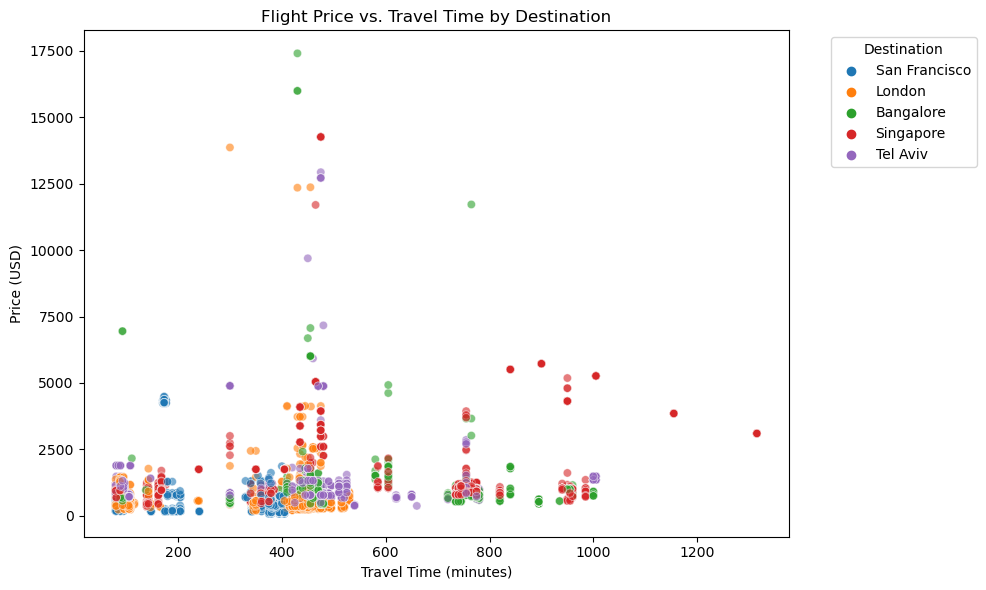

In [42]:
#| label: q2a-scatter-travel-time-vs-price
#| fig-cap: "Flight Price vs. Travel Time by Destination"
#| echo: true

# Convert Travel Time to minutes
df['Travel Time (min)'] = df['Travel Time'].dt.total_seconds() / 60

# Create scatterplot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Travel Time (min)', y='Price (USD)', hue='Destination', alpha=0.6)

# Labels and formatting
plt.title('Flight Price vs. Travel Time by Destination')
plt.xlabel('Travel Time (minutes)')
plt.ylabel('Price (USD)')
plt.legend(title='Destination', bbox_to_anchor=(1.05, 1), loc='upper left')

# Save
plt.tight_layout()
plt.savefig(os.path.join(results_dir, "scatter_price_vs_travel_time.png"))
plt.savefig(os.path.join(results_dir, "scatter_price_vs_travel_time.jpg"))
plt.show()


explanations

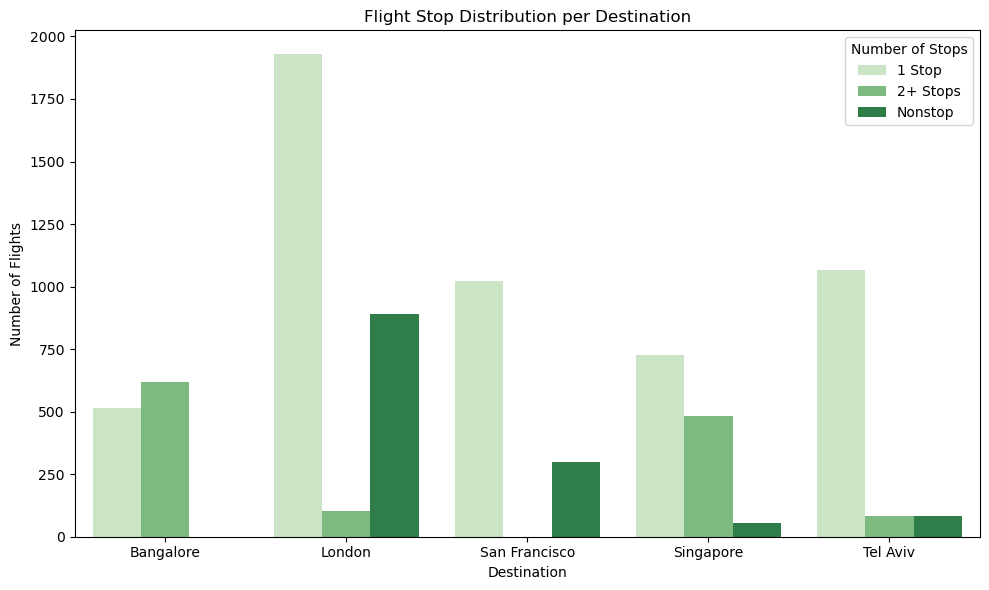

In [43]:
#| label: q2b-bar-stops-per-city
#| fig-cap: "Flight Stop Distribution per Destination"
#| echo: true

# Map Number of Stops to categories for clarity
df['Stop Type'] = df['Number of Stops'].map({
    0: 'Nonstop',
    1: '1 Stop',
    2: '2+ Stops'
})

# Group data by Destination and Stop Type, counting flights
stop_counts = df.groupby(['Destination', 'Stop Type']).size().reset_index(name='Count')

# Plot bar chart
plt.figure(figsize=(10, 6))
sns.barplot(data=stop_counts, x='Destination', y='Count', hue='Stop Type', palette='Greens')

# Labels and title
plt.title('Flight Stop Distribution per Destination')
plt.xlabel('Destination')
plt.ylabel('Number of Flights')
plt.legend(title='Number of Stops')

plt.tight_layout()
plt.savefig(os.path.join(results_dir, "bar_flight_stops_per_city.png"))
plt.savefig(os.path.join(results_dir, "bar_flight_stops_per_city.jpg"))
plt.show()


explanations

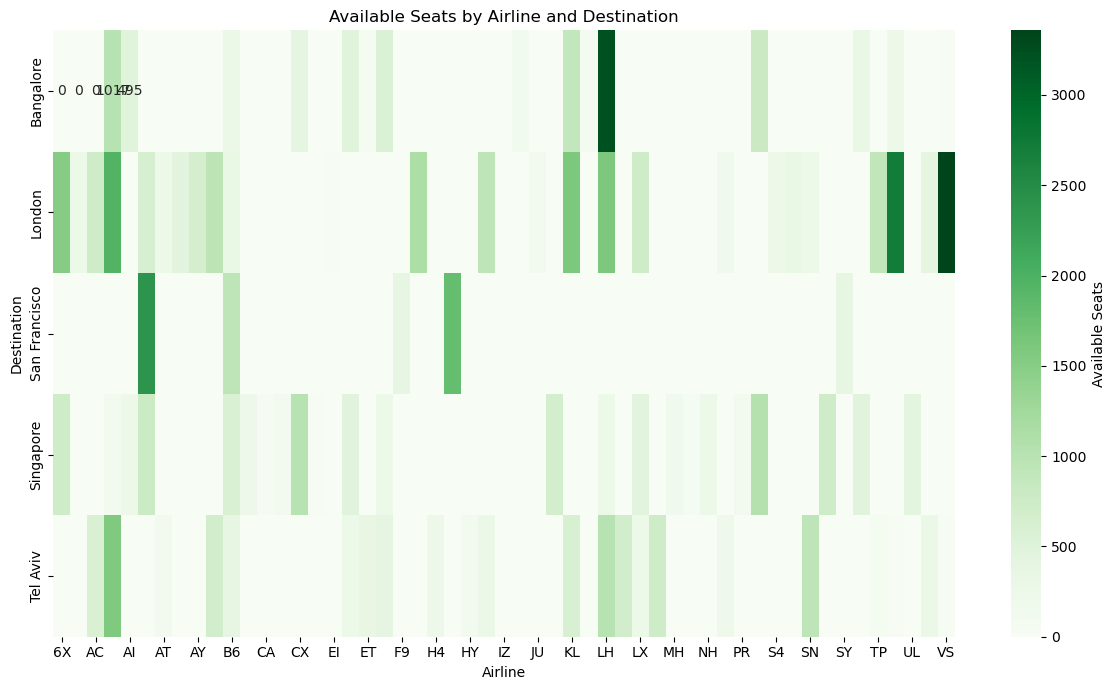

In [44]:
#| label: q3-seat-availability-heatmap
#| fig-cap: "Available Seats on Popular Flight Routes"
#| echo: true

# Group by Destination and Airline, sum available seats
seat_availability = df.groupby(['Destination', 'Airline'])['Available Seats'].sum().reset_index()

# Pivot for heatmap (Destinations as rows, Airlines as columns)
seat_pivot = seat_availability.pivot(index='Destination', columns='Airline', values='Available Seats').fillna(0)

# Plot heatmap
plt.figure(figsize=(12, 7))
sns.heatmap(seat_pivot, annot=True, fmt=".0f", cmap='Greens', cbar_kws={'label': 'Available Seats'})

plt.title('Available Seats by Airline and Destination')
plt.xlabel('Airline')
plt.ylabel('Destination')

plt.tight_layout()
plt.savefig(os.path.join(results_dir, "heatmap_available_seats.png"))
plt.savefig(os.path.join(results_dir, "heatmap_available_seats.jpg"))
plt.show()
